## Mission 1. Netfilx and Code

### Mandatory Part

[넷플릭스 데이터](https://www.kaggle.com/shivamb/netflix-shows)가 주어졌을 때, 다음 질문에 답하시오:  
  
- 한국 작품은 총 얼마나 있는가?
- country column을 기준으로 한다.
- "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

In [4]:
# 임포트 작업
import pandas as pd

# .csv 가져오기

netflix = pd.read_csv('./netflix_titles.csv')

netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [11]:
# country열에서 'South Korea'만 출력
netflix_kr = netflix[netflix['country'] == 'South Korea']

netflix_kr

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",2020,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ..."
51,s52,TV Show,100 Days My Prince,NaN,"Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho ...",South Korea,"December 7, 2020",2018,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Upon losing his memory, a crown prince encount..."
61,s62,TV Show,12 Years Promise,NaN,"So-yeon Lee, Namkoong Min, Tae-im Lee, So-hui ...",South Korea,"May 22, 2017",2014,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A pregnant teen is forced by her family to lea...
81,s82,Movie,2015 Dream Concert,NaN,"4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, I...",South Korea,"April 28, 2017",2015,TV-PG,107 min,"International Movies, Music & Musicals",The world's biggest K-pop festival marked its ...
91,s92,Movie,26 Years,Geun-hyun Cho,"Goo Jin, Hye-jin Han, Soo-bin Bae, Seul-ong Im...",South Korea,"October 1, 2017",2012,TV-MA,135 min,"Dramas, International Movies, Thrillers",Twenty-six years after the 1980 massacre at Gw...
...,...,...,...,...,...,...,...,...,...,...,...,...
7583,s7584,TV Show,When the Camellia Blooms,NaN,"Kong Hyo-jin, Kang Ha-neul, Kim Ji-seok, Oh Ju...",South Korea,"September 18, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Dongbaek is a single mother. When a potential ...
7601,s7602,TV Show,White Nights,NaN,"Yo-Won Lee, Goo Jin, U-ie, Hae-in Jung, Gook-h...",South Korea,"February 14, 2017",2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, TV Dr...","A coldhearted heiress, a man from her past and..."
7711,s7712,TV Show,YG Future Strategy Office,NaN,"Seungri, Yoo Byung Jae, Lee Jai-jin, Jinu, Son...",South Korea,"October 5, 2018",2018,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Co...","K-pop star Seungri, BIGBANG's youngest member,..."
7718,s7719,Movie,Yoo Byung Jae: Discomfort Zone,Y. Joon Chung,Yoo Byung Jae,South Korea,"August 17, 2018",2018,TV-MA,54 min,Stand-Up Comedy,Daring comedian Yoo Byung-jae connects critici...


In [17]:
# 위 데이터프레임의 행의 개수를 출력

len(netflix_kr)

# 아래는 다른 방법들
# netflix_kr.shape[0]
# len(netflix_kr.index)

183

### Bonus Part

[넷플릭스 데이터](https://www.kaggle.com/shivamb/netflix-shows)가 주어졌을 때, 다음 질문에 답하시오:  
  
- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
- country column을 기준으로 한다.
- __단일 국가__인 경우를 기준으로 결과를 구해보자.

In [18]:
# 기존의 임포트와 넷플릭스 데이터프레임 사용

netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [51]:
# 국가별로 그룹바이하고 제목의 개수를 센 데이터를 시리즈로 저장
netflix_count = netflix['title'].groupby(by=netflix['country']).count()

# 최대값과 국가 출력

(netflix_count.idxmax(), netflix_count.max())

('United States', 2555)

## Mission 2. 가즈아!

### Mandatory Part  
  
[다음 데이터](https://www.kaggle.com/rishidamarla/bitcoin-prices-20112015)가 주어졌을 때 2016.6 ~ 2017.6 기간의 __5-MA(Moving Average) 비트코인 가격 그래프__를 그려주세요.  
  
- 선의 색깔은 __노란색(#f2a900)__ 으로 해야합니다.  
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.  
- 이동평균의 기준은 Open Column으로 계산합니다.  
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.  
💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.  

In [30]:
# 임포트 작업

import pandas as pd
import matplotlib.pyplot as plt

# .csv 가져오기

bitcoin = pd.read_csv('./BitCoin.csv')

bitcoin.head(10)

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000
5,5,2017-09-17,3606.28,3664.81,3445.64,3582.88,1.239150e+09,59757800000
6,6,2017-09-16,3637.75,3808.84,3487.79,3625.04,1.818400e+09,60271600000
7,7,2017-09-15,3166.30,3733.45,2946.62,3637.52,4.148070e+09,52453500000
8,8,2017-09-14,3875.37,3920.60,3153.86,3154.95,2.716310e+09,64191600000
9,9,2017-09-13,4131.98,4131.98,3789.92,3882.59,2.219410e+09,68432200000


In [80]:
# 날짜와 Open 값만 추출

bitcoin_do = bitcoin['Open'].groupby(by=bitcoin['Date']).sum()

bitcoin_do = bitcoin_do['2016-06-01':'2017-06-30']

bitcoin_do

Date
2016-06-01     431.86
2016-06-02     386.59
2016-06-03     400.52
2016-06-04     424.28
2016-06-05     447.94
               ...   
2017-06-26    2590.57
2017-06-27    2478.45
2017-06-28    2553.03
2017-06-29    2567.56
2017-06-30    2539.24
Name: Open, Length: 377, dtype: float64

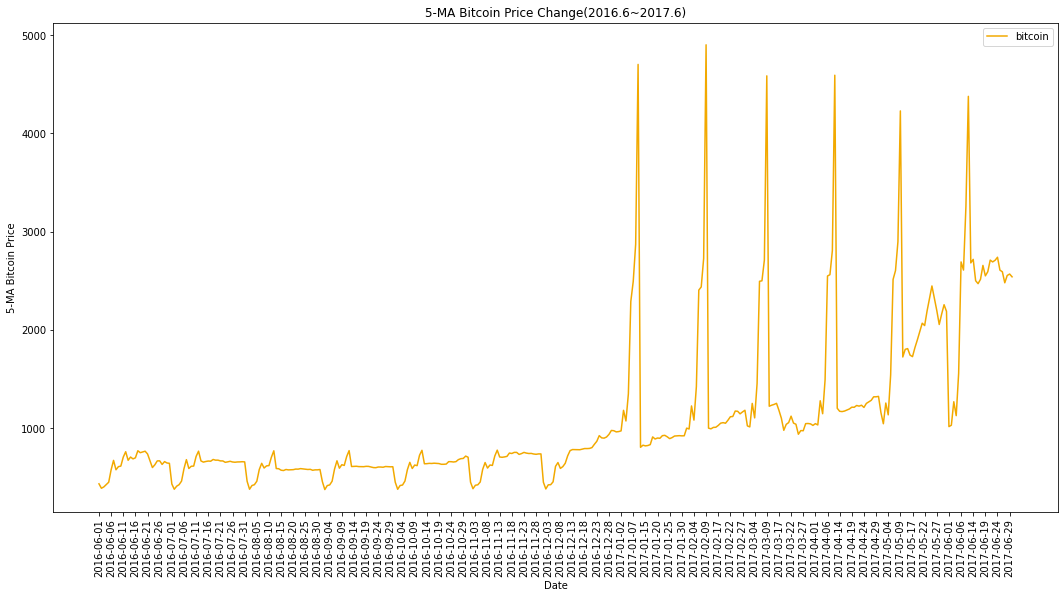

In [67]:
# 그래프 사이즈 설정, 크게 해줍니다.
plt.figure(figsize = (18, 9))

# 그래프로 출력할 데이터프레임을 연결시킵니다. 레이블과 색도 지정합니다.
plt.plot(bitcoin_do, label="bitcoin", color = '#f2a900')

# 추가적인 레이블을 설정합니다.
plt.xlabel("Date")
plt.ylabel("5-MA Bitcoin Price")
plt.title("5-MA Bitcoin Price Change(2016.6~2017.6)")

# x축 눈금 간격 및 단위 표시 방식을 설정합니다. 
plt.xticks([value for i, value in enumerate(bitcoin_do.keys()) if i%5 == 0], rotation = 90)

#레전드 출력도 하고...
plt.legend()

#마지막으로 그래프 출력을 합니다.
plt.show()

### Bonus Part  
  
위에 주어진 데이터와 더불어 [다음 데이터](https://www.kaggle.com/prasoonkottarathil/ethereum-historical-dataset?select=ETH_day.csv)도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 __비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에__ 그려주세요.

- 선의 색깔은 비트코인 : __노란색(#f2a900)__, 이더리움 : __검은색(#3c3c3d)__ 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 Open Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [68]:
# .csv 가져오기

ethereum = pd.read_csv('./ETH_day.csv')

ethereum.head(10)

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57
5,2020-04-10,ETHUSD,171.16,171.16,152.46,158.26,35635.43,5685082.32
6,2020-04-09,ETHUSD,173.48,173.48,165.33,171.16,17411.01,2961186.36
7,2020-04-08,ETHUSD,164.70,174.81,163.78,173.48,20071.04,3407046.49
8,2020-04-07,ETHUSD,171.49,176.74,162.34,164.70,46133.40,7868889.66
9,2020-04-06,ETHUSD,143.04,172.13,142.87,171.49,59235.58,9387070.16


In [69]:
# 날짜와 Open 값만 추출

ethereum_do = ethereum['Open'].groupby(by=ethereum['Date']).sum()

ethereum_do = ethereum_do['2016-06-01':'2017-06-30']

ethereum_do

Date
2016-06-01     14.18
2016-06-02     13.95
2016-06-03     13.90
2016-06-04     14.02
2016-06-05     13.86
               ...  
2017-06-26    278.73
2017-06-27    253.00
2017-06-28    286.21
2017-06-29    317.59
2017-06-30    293.80
Name: Open, Length: 395, dtype: float64

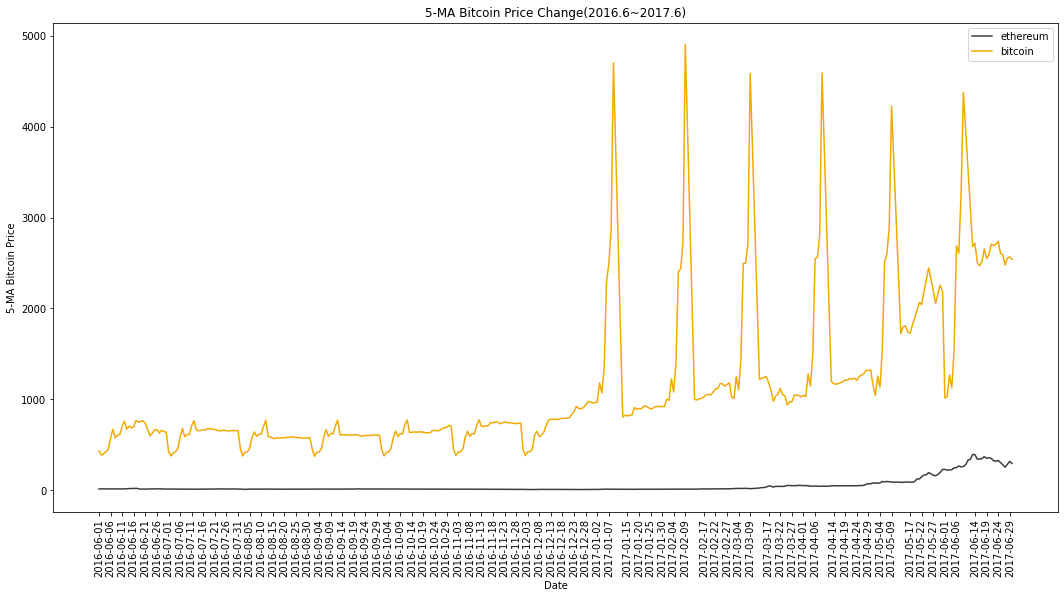

In [79]:
# 그래프 사이즈 설정, 크게 해줍니다.
plt.figure(figsize = (18, 9))

# 그래프로 출력할 데이터프레임을 연결시킵니다. 레이블과 색도 지정합니다.
# 이더리움을 먼저 연결하여 X축을 설정하고 그 다음 비트코인을 연결합니다.
# 이더리움의 경우 데이터 길이가 정상적으로 395개(1년+30일)이지만
# 비트코인은 이보다 짧으며 즉, 누락된 데이터가 있다는 뜻입니다.
plt.plot(ethereum_do, label="ethereum", color = '#3c3c3d')
plt.plot(bitcoin_do, label="bitcoin", color = '#f2a900')

# 추가적인 레이블을 설정합니다.
plt.xlabel("Date")
plt.ylabel("5-MA Bitcoin Price")
plt.title("5-MA Bitcoin Price Change(2016.6~2017.6)")

# x축 눈금 간격 및 단위 표시 방식을 설정합니다. 
plt.xticks([value for i, value in enumerate(bitcoin_do.keys()) if i%5 == 0], rotation = 90)

#레전드 출력도 하고...
plt.legend()

#마지막으로 그래프 출력을 합니다.
plt.show()